In [21]:
import keras
import numpy as np

In [22]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [23]:
len(train_data)

8982

In [24]:
len(test_data)

2246

In [25]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [26]:

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [27]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [28]:
train_labels[10]

3

In [29]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [30]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [31]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(120, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 190us/step - loss: 2.2936 - acc: 0.4982 - val_loss: 1.5259 - val_acc: 0.6490
Epoch 2/10
7982/7982 [==============================] - 1s 110us/step - loss: 1.3012 - acc: 0.7020 - val_loss: 1.2610 - val_acc: 0.6990
Epoch 3/10
7982/7982 [==============================] - 1s 107us/step - loss: 0.9826 - acc: 0.7658 - val_loss: 1.1188 - val_acc: 0.7380
Epoch 4/10
7982/7982 [==============================] - 1s 107us/step - loss: 0.7633 - acc: 0.8165 - val_loss: 1.0301 - val_acc: 0.7760
Epoch 5/10
7982/7982 [==============================] - 1s 119us/step - loss: 0.5761 - acc: 0.8667 - val_loss: 1.0774 - val_acc: 0.7640
Epoch 6/10
7982/7982 [==============================] - 1s 112us/step - loss: 0.4334 - acc: 0.9010 - val_loss: 1.0629 - val_acc: 0.7820
Epoch 7/10
7982/7982 [==============================] - 1s 110us/step - loss: 0.3717 - acc: 0.9123 - val_loss: 1.0226 - val_acc: 0.7760


In [36]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

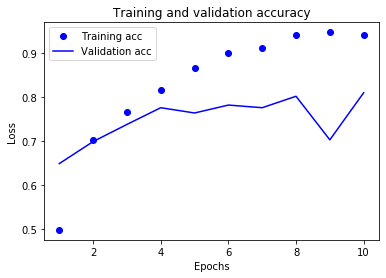

In [37]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.9740 - acc: 0.4248 - val_loss: 1.9360 - val_acc: 0.6010
Epoch 2/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.7505 - acc: 0.6277 - val_loss: 1.4291 - val_acc: 0.6720
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.3582 - acc: 0.6994 - val_loss: 1.2459 - val_acc: 0.7240
Epoch 4/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.1523 - acc: 0.7418 - val_loss: 1.1467 - val_acc: 0.7470
Epoch 5/20
7982/7982 [==============================] - 1s 96us/step - loss: 1.0070 - acc: 0.7774 - val_loss: 1.0644 - val_acc: 0.7760
Epoch 6/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.8660 - acc: 0.8034 - val_loss: 1.0319 - val_acc: 0.7770
Epoch 7/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.7732 - acc: 0.8282 - val_loss: 0.9853 - val_acc: 0.8000
Epoch 

In [39]:
print("\n 結果: %.4f" % (model.evaluate(x_val, y_val)[1]))

1000/1000 [==============================] - 0s 126us/step

 結果: 0.8090


In [40]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17586821015138024

In [41]:
predictions = model.predict(x_test)

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [44]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 183us/step - loss: 3.1108 - acc: 0.3500 - val_loss: 2.5270 - val_acc: 0.4170
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 2.1978 - acc: 0.4459 - val_loss: 2.0515 - val_acc: 0.4460
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.7764 - acc: 0.4721 - val_loss: 1.7175 - val_acc: 0.5480
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.4218 - acc: 0.6363 - val_loss: 1.4981 - val_acc: 0.6280
Epoch 5/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.1995 - acc: 0.6709 - val_loss: 1.3915 - val_acc: 0.6540
Epoch 6/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0336 - acc: 0.7281 - val_loss: 1.3432 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.9215 - acc: 0.7598 - val_loss: 1.3174 - val_acc: 0.7000


In [45]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 153us/step - loss: 2.6525 - acc: 0.5043 - val_loss: 1.7579 - val_acc: 0.6060
Epoch 2/15
7982/7982 [==============================] - 1s 90us/step - loss: 1.4612 - acc: 0.6901 - val_loss: 1.3186 - val_acc: 0.7090
Epoch 3/15
7982/7982 [==============================] - 1s 91us/step - loss: 1.0736 - acc: 0.7697 - val_loss: 1.1468 - val_acc: 0.7480
Epoch 4/15
7982/7982 [==============================] - 1s 95us/step - loss: 0.8470 - acc: 0.8213 - val_loss: 1.0484 - val_acc: 0.7780
Epoch 5/15
7982/7982 [==============================] - 1s 97us/step - loss: 0.6741 - acc: 0.8566 - val_loss: 0.9796 - val_acc: 0.7990
Epoch 6/15
7982/7982 [==============================] - 1s 99us/step - loss: 0.5417 - acc: 0.8877 - val_loss: 0.9371 - val_acc: 0.8020
Epoch 7/15
7982/7982 [==============================] - 1s 99us/step - loss: 0.4359 - acc: 0.9103 - val_loss: 0.9045 - val_acc: 0.8110
Epoch 

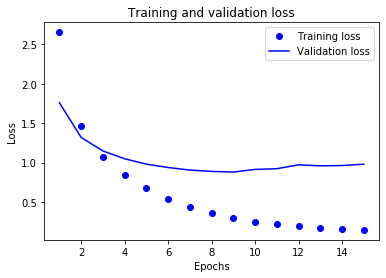

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()